# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
import timestamp 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

# Set Variables
date = []
country = []
city_name = []
cloudiness = []
max_temp = []
humidity = []
wind_speed = []
lat = []
lng = []

#Loop to make api calls w/ city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
# Try and except handling
    try:
        
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        wind_speed.append(response["wind"]["speed"])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping...")

Processing record 1|bluff
Processing record 2|north bend
Processing record 3|saskylakh
Processing record 4|nanortalik
Processing record 5|moratuwa
Processing record 6|natal
Processing record 7|cidreira
Processing record 8|mahebourg
Processing record 9|hasaki
Processing record 10|mar del plata
Processing record 11|lavumisa
Processing record 12|ilulissat
Processing record 13|provideniya
City not found. skipping...
Processing record 14|colwyn bay
Processing record 15|rikitea
Processing record 16|lavrentiya
Processing record 17|ushuaia
City not found. skipping...
Processing record 18|busselton
Processing record 19|cape town
Processing record 20|koppa
Processing record 21|kenai
Processing record 22|jamestown
Processing record 23|samarai
Processing record 24|astana
Processing record 25|khandbari
City not found. skipping...
Processing record 26|mataura
Processing record 27|itarema
Processing record 28|yellowknife
Processing record 29|bandipur
Processing record 30|batagay-alyta
Processing reco

Processing record 244|vao
Processing record 245|lata
Processing record 246|kiboga
Processing record 247|odlabari
Processing record 248|lakselv
Processing record 249|road town
City not found. skipping...
Processing record 250|ulagan
Processing record 251|yatou
Processing record 252|malkapur
City not found. skipping...
Processing record 253|kavaratti
Processing record 254|bathsheba
Processing record 255|matamoros
Processing record 256|maracaju
Processing record 257|faya
Processing record 258|san cristobal
Processing record 259|mango
Processing record 260|ancud
Processing record 261|luancheng
Processing record 262|baihar
Processing record 263|annau
Processing record 264|kurchatov
Processing record 265|olinda
Processing record 266|mahibadhoo
Processing record 267|vila franca do campo
Processing record 268|cabo san lucas
Processing record 269|carstairs
Processing record 270|palana
Processing record 271|bronnoysund
Processing record 272|bilma
Processing record 273|grindavik
Processing record

Processing record 488|makakilo city
Processing record 489|sistranda
Processing record 490|naryan-mar
Processing record 491|chimbote
Processing record 492|olyka
Processing record 493|green river
Processing record 494|avera
Processing record 495|simpang
Processing record 496|stornoway
Processing record 497|cabra
Processing record 498|anloga
Processing record 499|puerto colombia
Processing record 500|pangody
Processing record 501|sisimiut
Processing record 502|wembley
Processing record 503|tashtagol
Processing record 504|totness
City not found. skipping...
Processing record 505|talakan
Processing record 506|mezen
Processing record 507|batsfjord
Processing record 508|rocha
City not found. skipping...
City not found. skipping...
Processing record 509|dingle
Processing record 510|yarada
Processing record 511|celestun
Processing record 512|sarankhola
Processing record 513|rulenge
Processing record 514|kargil
Processing record 515|lima
Processing record 516|havoysund
Processing record 517|bour

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
#Creat city dataframe
city_df = pd.DataFrame({"Date":date, 
                        "Country":country, 
                        "City":city_name, 
                        "Cloudiness":cloudiness, 
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed,
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng
                                         })
city_df = city_df.rename_axis('City ID')

city_df["Date"] = pd.to_datetime(city_df['Date'], unit ='s').dt.date

#Export to csv
city_df.to_csv("output_data/city_data.csv")

#Display dataframe
city_df.head()

,Date,Country,City,Cloudiness,Max Temp,Wind Speed,Humidity,Lat,Lng
City ID,,,,,,,,,
0,2021-04-16,NZ,Bluff,100,42.01,5.99,94,-46.6000,168.3333
1,2021-04-16,US,North Bend,75,71.01,6.91,87,43.4065,-124.2243
2,2021-04-16,RU,Saskylakh,100,11.19,15.28,94,71.9167,114.0833
3,2021-04-16,GL,Nanortalik,63,21.88,48.45,51,60.1432,-45.2371
4,2021-04-16,LK,Moratuwa,20,78.80,2.30,83,6.7730,79.8816


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [32]:
humidity_check = city_df["Humidity"].max()
humidity_check

100

In [33]:
#  Get the indices of cities that have humidity over 100%.


In [34]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

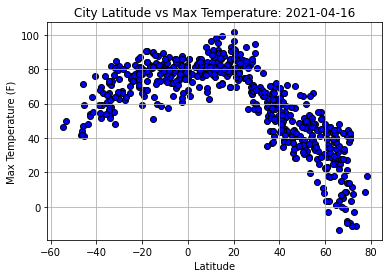

In [35]:
# define date
date_st = city_df['Date'][0]

# Scatter plot of lat and Temp
plt.scatter(city_df["Lat"], city_df["Max Temp"], facecolor = "blue", edgecolor = "black")
plt.title(f'City Latitude vs Max Temperature: {date_st}')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('output_data/lat_temp_plot')
plt.show

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

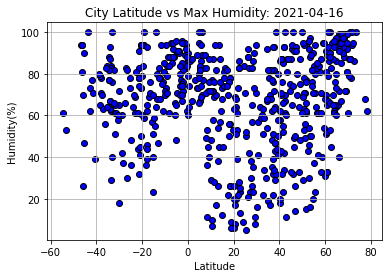

In [36]:
# Scatter plot of lat and humididty
plt.scatter(city_df["Lat"], city_df["Humidity"], facecolor = "blue", edgecolor = "black")
plt.title(f'City Latitude vs Max Humidity: {date_st}')
plt.ylabel("Humidity(%)")
plt.xlabel('Latitude')
plt.grid()
plt.savefig('output_data/lat_humidity_plot')
plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

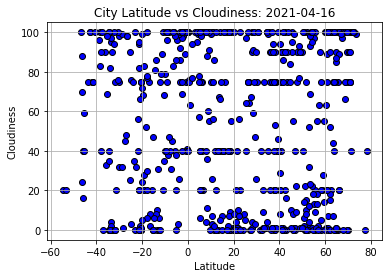

In [37]:
# Scatter plot of lat and cloudiness

plt.scatter(city_df["Lat"], city_df["Cloudiness"], facecolor = "blue", edgecolor = "black")
plt.title(f'City Latitude vs Cloudiness: {date_st}')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('output_data/lat_cloudy_plot')
plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

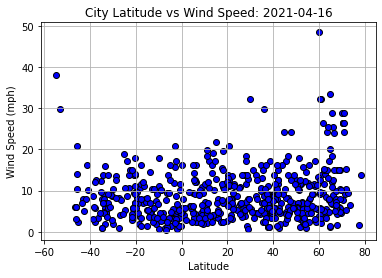

In [38]:
# Scatter plot of Lat and Wind Speed

plt.scatter(city_df["Lat"], city_df["Wind Speed"], facecolor = "blue", edgecolor = "black")
plt.title(f'City Latitude vs Wind Speed: {date_st}')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('output_data/lat_wind_plot')
plt.show

In [39]:
Northern_hemisphere = city_df.loc[city_df["Lat"]>0]
Southern_hemisphere = city_df.loc[city_df["Lat"]<0]

In [40]:
def linear_reg(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8691493502811183


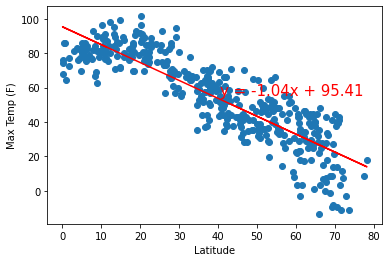

None


In [41]:
# Temp vs Lat (North)
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg(x_values,y_values))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6435168231386867


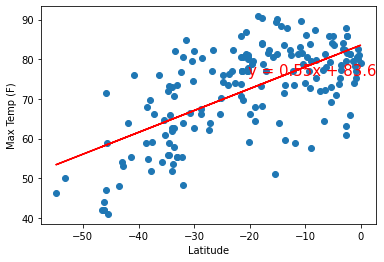

None


In [42]:
# Temp vs Lat (South)
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg(x_values,y_values))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2445769235973699


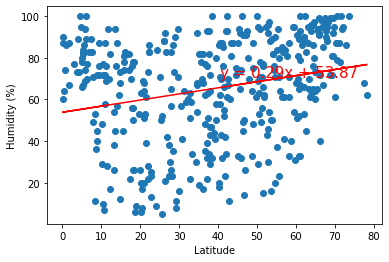

None


In [43]:
# Lat vs Humidity (North)
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg(x_values,y_values))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.22411481236281644


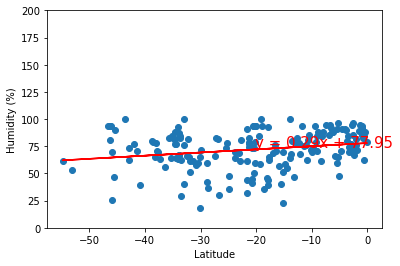

None


In [44]:
# Lat vs Humidity (South)
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity (%)")
print(linear_reg(x_values,y_values))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.040273530399906665


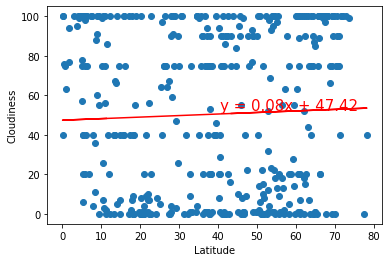

None


In [45]:
# Lat vs Cloudiness (North)
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg(x_values,y_values))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.14424968557133502


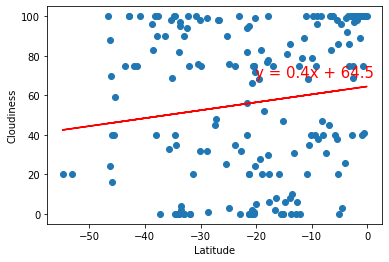

None


In [46]:
# Lat vs Cloudiness (South)
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg(x_values,y_values))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.17707186649404122


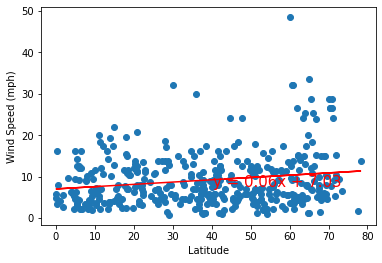

None


In [47]:
# Lat vs wind speed (North)
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed (mph)")
print(linear_reg(x_values,y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.24262760667781924


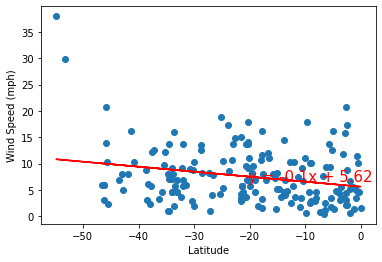

None


In [48]:
# Lat vs wind speed (South)
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed (mph)")
print(linear_reg(x_values,y_values))